# Momentum and Vorticity Budget in Barotropic Gyre

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.xarray

In [2]:
import xmitgcm
xmitgcm.file_utils.clear_cache()

## Load Data

In [3]:
rundir = '/rigel/ocp/users/ra2697/tutorial_barotropic_gyre/run'
ds = xmitgcm.open_mdsdataset(rundir, iters=72*np.arange(1,201), geometry='cartesian',
                             delta_t=1200, calendar='360_day', ref_date='0000-01-01 00:00:00')
ds

/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/rigel/ocp/projects/conda/envs/pangeo2020/lib/python3.7/site-packages/xmitgcm/mds_store.py:236: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
op

<xarray.Dataset>
Dimensions:   (XC: 62, XG: 62, YC: 62, YG: 62, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 200)
Coordinates:
  * XC        (XC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * YC        (YC) >f4 -10000.0 10000.0 30000.0 ... 1190000.0 1210000.0
  * XG        (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * YG        (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * Z         (Z) >f4 -2500.0
  * Zp1       (Zp1) >f4 0.0 -5000.0
  * Zu        (Zu) >f4 -5000.0
  * Zl        (Zl) >f4 0.0
    rA        (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxG       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyG       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    Depth     (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAz       (YG, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dxC       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    dyC       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAw       (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    rAs       (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    drC       (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF       (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefC    (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF    (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    hFacC     (YC, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacW     (YC, XG) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    hFacS     (YG, XC) >f4 dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskC     (YC, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskW     (YC, XG) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    maskS     (YG, XC) bool dask.array<chunksize=(62, 62), meta=np.ndarray>
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
Data variables:
    Eta       (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PH        (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    USidDrag  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    VSidDrag  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Diss   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Diss   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_ImplD  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_ImplD  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Advec  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Advec  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Cori   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Cori   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_dPhiX  (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_dPhiY  (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Um_Ext    (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    Vm_Ext    (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    botTauX   (time, YC, XG) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    botTauY   (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    V         (time, YG, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    W         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    S         (time, YC, XC) float32 dask.array<chunksize=(1, 62, 62), meta=np.ndarray>
    PHL       (time, YC, XC) float32 dask.array<chunksize

In [4]:
import xgcm
metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drF', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}
grid = xgcm.Grid(ds, metrics=metrics, periodic=False)
grid

<xgcm.Grid>
T Axis (not periodic):
  * center   time
X Axis (not periodic):
  * center   XC --> left
  * left     XG --> center
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
Y Axis (not periodic):
  * center   YC --> left
  * left     YG --> center

In [5]:
plt.rcParams['axes.facecolor'] = '0.5'

## Zonal Momentum Budget

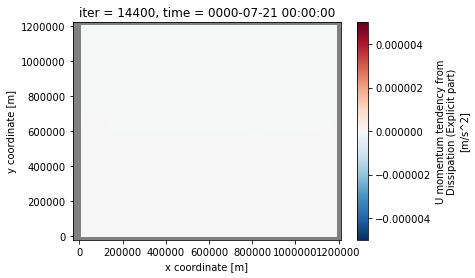

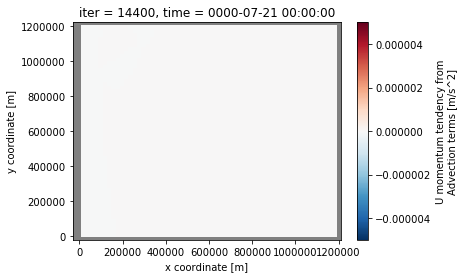

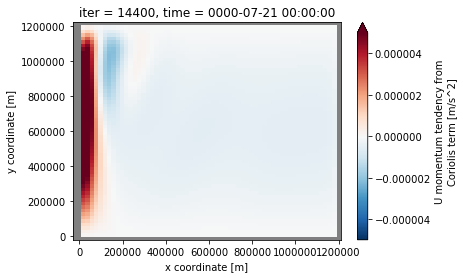

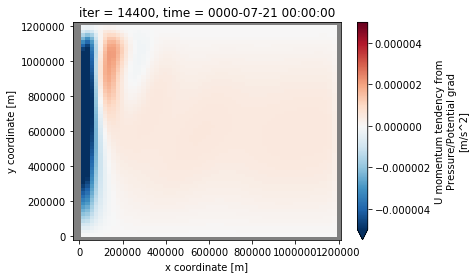

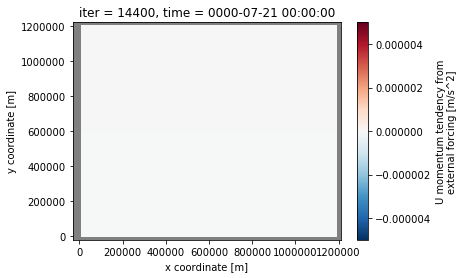

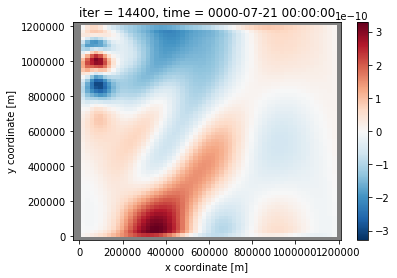

In [6]:
# http://mailman.mitgcm.org/pipermail/mitgcm-support/2010-December/006920.html
# > seem to be double counting with Um_Advec and Um_Cori
# > For vector invariant momentum formulation (not sure about flux 
# > form) Um_Advec includes coriolis

Um_advec_wo_coriolis = ds.Um_Advec - ds.Um_Cori
Um_advec_wo_coriolis.attrs.update(ds.Um_Advec.attrs)

names = ['Dissipation', 'Avection', 'Coriolis', 'Pressure Gradient', 'External Forcing']

terms_U = [ds.Um_Diss, Um_advec_wo_coriolis, ds.Um_Cori, ds.Um_dPhiX , ds.Um_Ext]
sum_terms_U = sum(terms_U)

vmax=5e-6


mask_u = ds.hFacW > 0.

for term in terms_U:
    data = term[-1].where(mask_u)
    plt.figure()
    data.plot(vmax=vmax)
    
    
plt.figure()
sum_terms_U[-1].where(mask_u).plot()

## Meridional Momentum Budget

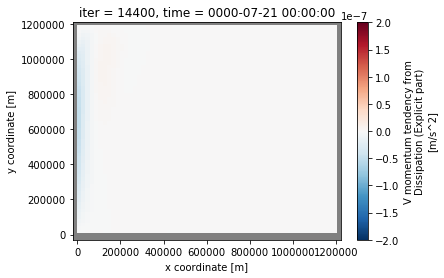

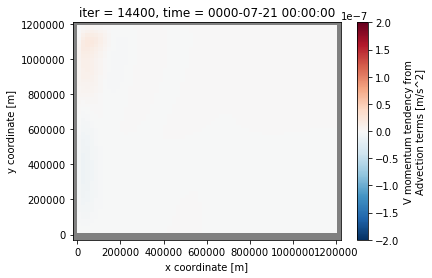

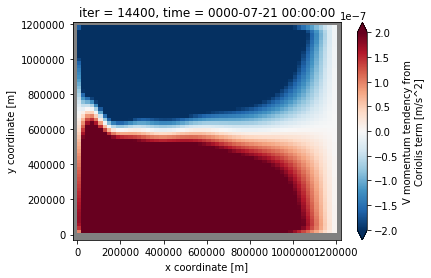

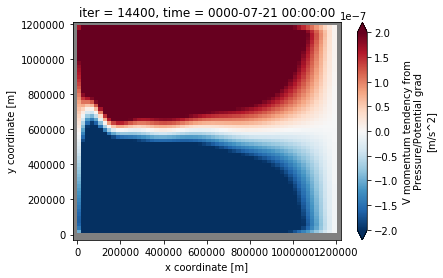

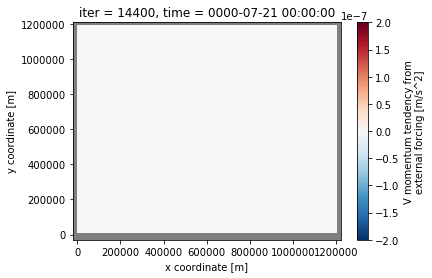

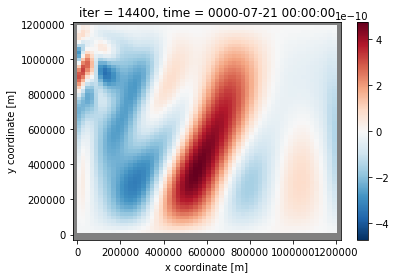

In [7]:
Vm_advec_wo_coriolis = ds.Vm_Advec - ds.Vm_Cori
Vm_advec_wo_coriolis.attrs.update(ds.Vm_Advec.attrs)

terms_V = [ds.Vm_Diss, Vm_advec_wo_coriolis, ds.Vm_Cori, ds.Vm_dPhiY , ds.Vm_Ext]
sum_terms_V = sum(terms_V)

vmax=2e-7

mask_v = ds.hFacS > 0.

for term in terms_V:
    plt.figure()
    term[-1].where(mask_v).plot(vmax=vmax, vmin=-vmax, cmap='RdBu_r')
    
plt.figure()
sum_terms_V[-1].where(mask_v).plot()

## Vorticity Budget

In [8]:
def curl(u, v):
    return (-grid.diff(u * ds.dxC, 'Y', boundary='extend') +
             grid.diff(v * ds.dyC, 'X', boundary='extend')) / ds.rAz

In [9]:
terms_curl = [curl(u, v) for u, v in zip(terms_U, terms_V)]

In [10]:
mask_z = ((1 - grid.interp(ds.hFacS, 'X', boundary='extend')) +
          (1 - grid.interp(ds.hFacW, 'Y', boundary='extend'))) < 1.
mask_z

<xarray.DataArray (YG: 62, XG: 62)>
dask.array<lt, shape=(62, 62), dtype=bool, chunksize=(61, 61), chunktype=numpy.ndarray>
Coordinates:
  * YG       (YG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0
  * XG       (XG) >f4 -20000.0 0.0 20000.0 ... 1160000.0 1180000.0 1200000.0

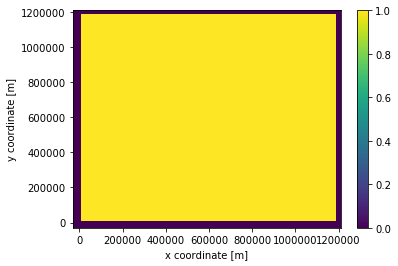

In [11]:
mask_z.plot()

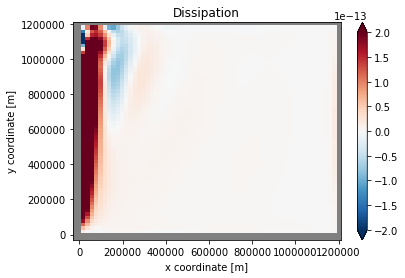

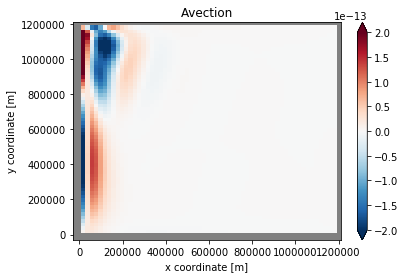

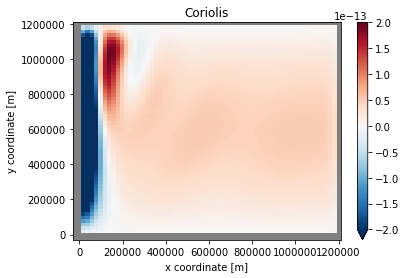

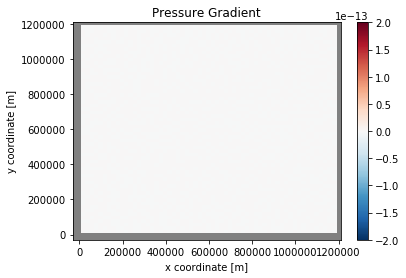

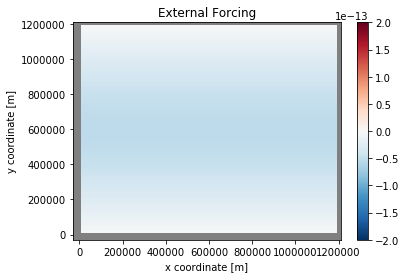

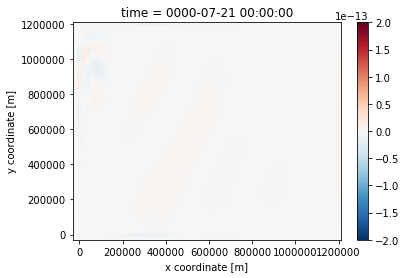

In [12]:
vmax=2e-13

for term, name in zip(terms_curl, names):
    plt.figure()
    term[-1].where(mask_z).plot(vmax=vmax)
    plt.title(name)
    
plt.figure()
sum(terms_curl)[-1].plot(vmax=vmax)

In [15]:
ds_vort = xr.merge([term.rename(name) for term, name in zip(terms_curl, names)])
ds_vort

<xarray.Dataset>
Dimensions:            (XG: 62, YG: 62, time: 200)
Coordinates:
  * time               (time) object 0000-01-02 00:00:00 ... 0000-07-21 00:00:00
  * YG                 (YG) >f4 -20000.0 0.0 20000.0 ... 1180000.0 1200000.0
  * XG                 (XG) >f4 -20000.0 0.0 20000.0 ... 1180000.0 1200000.0
    rAz                (YG, XG) float32 dask.array<chunksize=(62, 62), meta=np.ndarray>
Data variables:
    Dissipation        (time, YG, XG) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    Avection           (time, YG, XG) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    Coriolis           (time, YG, XG) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    Pressure Gradient  (time, YG, XG) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>
    External Forcing   (time, YG, XG) float32 dask.array<chunksize=(1, 1, 1), meta=np.ndarray>

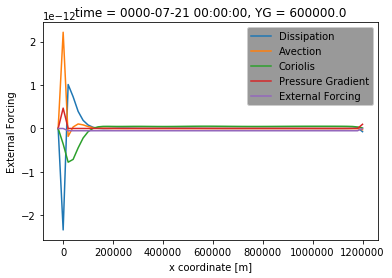

In [27]:
ds_to_plot = ds_vort.isel(time=-1).sel(YG=600000, method='nearest')

fig, ax = plt.subplots()
ax.set_facecolor('white')
for dvar in ds_to_plot:
    ds_to_plot[dvar].plot(label=dvar, ax=ax)
    
plt.legend()